### 목표
- 불꽃의 꽃잎의 길이, 꽃잎의 너비, 꽃받침의 길이, 꽃받침의 너비 4가지 특성을 이용해 3가지 품종을 분류해보자.
- 이웃의 수를 조정하는 하이퍼파라미터 튜닝을 해보자

In [121]:
#필요한 도구 불러오기
import pandas as pd

#그래프 사용
import matplotlib.pyplot as plt

#knn모델 사용
from sklearn.neighbors import KNeighborsClassifier

#train, test분리+랜덤 샘플링
from sklearn.model_selection import train_test_split

#정확도 측정
from sklearn import metrics

In [122]:
#불러와서 확인해보자
from sklearn.datasets import load_iris

In [123]:
#iris 데이터를 불러오자
iris_data=load_iris()

#bunch객체(자료형)
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [124]:
#{key.value}

### 데이터 확인

In [125]:
#key값들 확인
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [126]:
#접근 방법 2가지 모두 같은 방법이다.
#iris_data['data'] 
iris_data.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [127]:
#특성의 이름을 확인
iris_data.feature_names

#sepal length (cm) 꽃받침의 길이
#sepal width (cm) 꽃받침의 너비
#petal length (cm) 꽃잎의 길이
#petal width (cm) 꽃잎의 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [128]:
#target 확인해보기 -> 답 레이블
#iris_data['target']
iris_data.target[:5]

array([0, 0, 0, 0, 0])

In [129]:
#붗꽃 품종
iris_data.target_names
#0-setosa
#1-versicolor
#2-virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [130]:
#iris 데이터 정보 확인
#iris_data['DESCR']
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 데이터 셋 구성하기
- 데이터 프레임 구성하기
- 트레인, 테스트 분리

In [131]:
#pd.DataFrame(특성 데이터, 컬럼=특성이름)
iris_df=pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df[:5]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [132]:
#정답 레이블
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [133]:
# X 문제 , y 답
X=iris_df
y=iris_data.target

In [134]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [135]:
#train, test분리!!
#randomsampling(랜덤샘플링) : random_state=1  1을 기준으로 섞어주세요 라는 뜻
#기준을 정하지 않을 경우 계속해서 값이 변경이 되어서 정확한 데이터를 뽑기 힘들다.
#train_test_split 함수이용 - train, test 7:3(0.3) 나누는 기능
#7:3일때의 비율이 학습률이 높고 정확도가 높으므로 이를 사용한다.
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=65)

In [136]:
X_train.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
132                6.4               2.8                5.6               2.2
129                7.2               3.0                5.8               1.6
83                 6.0               2.7                5.1               1.6
19                 5.1               3.8                1.5               0.3
27                 5.2               3.5                1.5               0.2

In [137]:
#X_train, X_text, y_train, y_test크기 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### EDA 탐색적 데이터 분석
- 어떤 특성끼리 상관관계가 있는지 확인

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

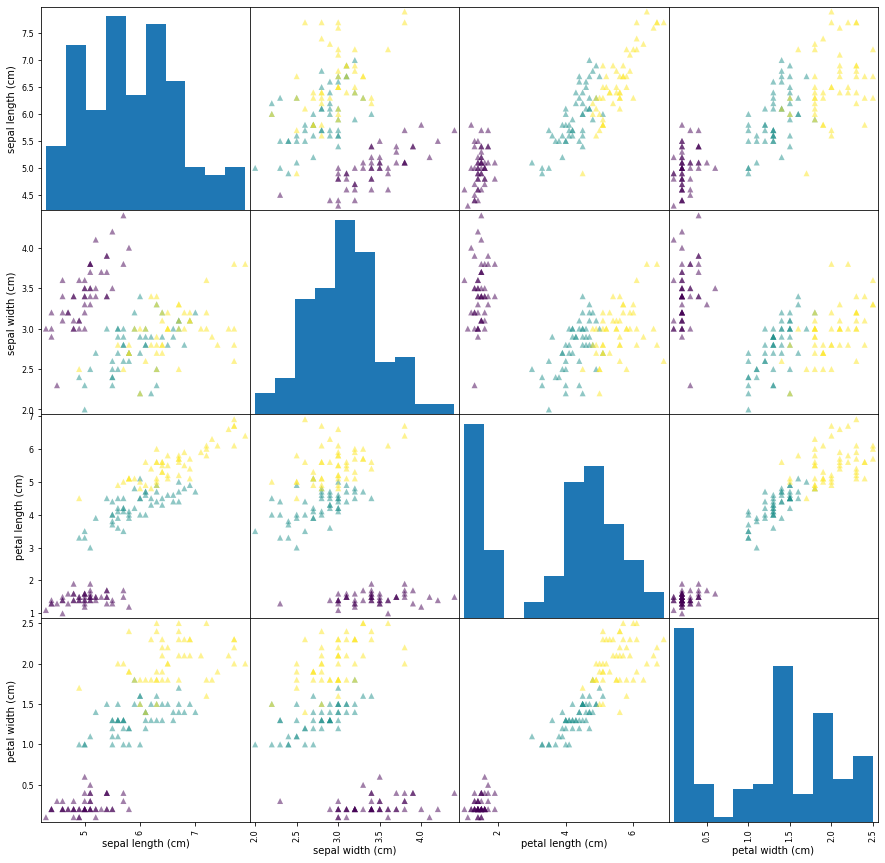

In [138]:
#figsize(행, 열)
pd.plotting.scatter_matrix(iris_df, figsize=(15,15), marker='^', c=y)

### 상관관계
### -1, 0, 1
### 0일때 상관관계가 없다.
### -1, 1일때 상관관계가 높다
### -1 음의 상관관계
### 1 양의 상관관계

### 모델링
- 머신러닝 모델 객체 생성
- 하이퍼 파라미터 조정
- 학습하기
- 예측하기
- 정확도 확인

In [139]:
#모델 객체 생성 + 하이퍼 파라미터 입력
knn_model=KNeighborsClassifier(n_neighbors=1)

In [140]:
knn_model

KNeighborsClassifier(n_neighbors=1)

In [141]:
#학습하기
#fit(트레인 문제, 트레인답)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [142]:
#예측하기
#테스트 문제 predict(x_test)
pre=knn_model.predict(X_test)
#0,1,2
pre

array([2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 1,
       0])

In [143]:
#metrics.accuracy_score(실제답, 예측값)
metrics.accuracy_score(y_test, pre)

0.9333333333333333

In [144]:
X_test.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
127                6.1               3.0                4.9               1.8
68                 6.2               2.2                4.5               1.5
9                  4.9               3.1                1.5               0.1
54                 6.5               2.8                4.6               1.5
31                 5.4               3.4                1.5               0.4

### 하이퍼 파라미터 조정

In [145]:
train_score_list=[]
test_score_list=[]

In [146]:
len(range(1, 105, 2))

52

In [147]:
for k in range(1, 105, 2) :
    m=KNeighborsClassifier(n_neighbors=k)
    #모델학습
    m.fit(X_train, y_train)
    
    #test
    test_pre=m.predict(X_test)
    test_score=metrics.accuracy_score(y_test, test_pre)
    test_score_list.append(test_score)
    
    #train
    train_pre=m.predict(X_train)
    train_score=metrics.accuracy_score(y_train, train_pre)
    train_score_list.append(train_score)

In [148]:
train_score_list
len(train_score_list)

52

In [149]:
test_score_list
len(test_score_list)

52

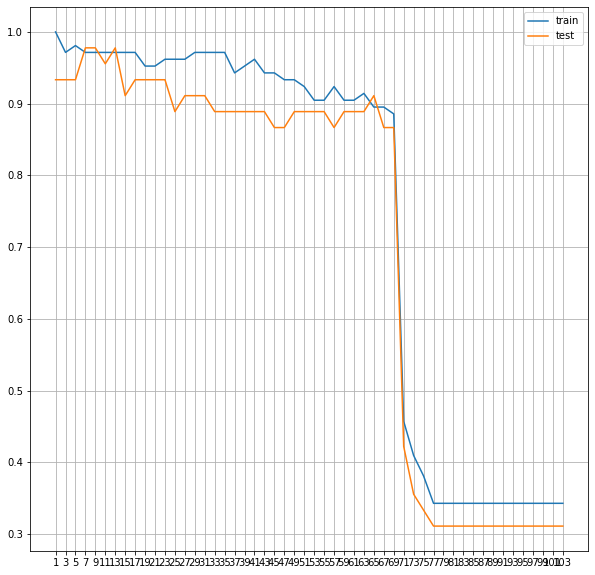

In [156]:
plt.figure(figsize=(10,10))
plt.plot(range(1, 105, 2), train_score_list, label='train')
plt.plot(range(1,105,2), test_score_list, label='test')
#범례 보여주기
plt.legend()
plt.grid()
#x축값 설정
plt.xticks(range(1, 105, 2))

# #limit 걸기
#plt.ylim(0.8, 1)
plt.show()

#train 데이터에서도 정확도가 어느정도 높고, 
#test데이터의 정확도도 어느정도 높아야 한다
#train, test정확도 차이 조금은 적은 부분 살펴보기